In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#test데이터를 분석하여 그 정보를 활용하는 것은 Data Leakage에 해당하기에 train데이터만 사용합니다
train = pd.read_csv('/content/drive/MyDrive/풍력 발전_dacon/test.csv')
train.head()

,id,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,snowing,cloudiness
0,TEST_00000,20.702000,1021.0,76.4,2.0,104.8,0.00,False,23.0
1,TEST_00001,18.673669,1014.4,59.6,2.4,179.2,0.12,False,32.4
2,TEST_00002,29.908000,1020.6,49.6,2.6,78.0,0.60,False,23.0
3,TEST_00003,24.504000,1014.6,61.0,1.8,118.0,0.00,False,15.0
4,TEST_00004,12.590000,1011.4,70.8,1.8,110.0,0.12,False,34.0


In [ ]:
#qualitative: 질적 변수입니다
qual_df = train[['snowing']]
#quantitative: 양적 변수입니다
quan_df = train.drop(columns = ['id','snowing'])

In [ ]:
#데이터 전체 수와 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19275 entries, 0 to 19274
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19275 non-null  object 
 1   temperature     19275 non-null  float64
 2   pressure        19275 non-null  float64
 3   humidity        19275 non-null  float64
 4   wind_speed      19275 non-null  float64
 5   wind_direction  19275 non-null  float64
 6   precipitation   19275 non-null  float64
 7   snowing         19275 non-null  bool   
 8   cloudiness      19275 non-null  float64
dtypes: bool(1), float64(7), object(1)
memory usage: 1.2+ MB


In [ ]:
#데이터 기술통계량 확인
train.describe()

,temperature,pressure,humidity,wind_speed,wind_direction,precipitation,cloudiness
count,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000,19275.000000
mean,17.234841,1070.601639,68.924182,2.495699,166.699642,0.077166,25.564887
std,7.191292,2591.110215,14.794539,1.365812,57.041635,0.198388,17.583694
min,-0.091600,812.400000,24.400000,0.200000,0.000000,0.000000,0.000000
25%,11.704250,1012.600000,57.800000,1.400000,127.000000,0.000000,12.000000
50%,16.498000,1016.800000,70.600000,2.200000,166.000000,0.000000,23.000000
75%,22.550000,1021.000000,80.800000,3.200000,206.000000,0.060000,36.600000
max,37.116000,202469.000000,100.000000,17.400000,337.000000,3.180000,92.000000


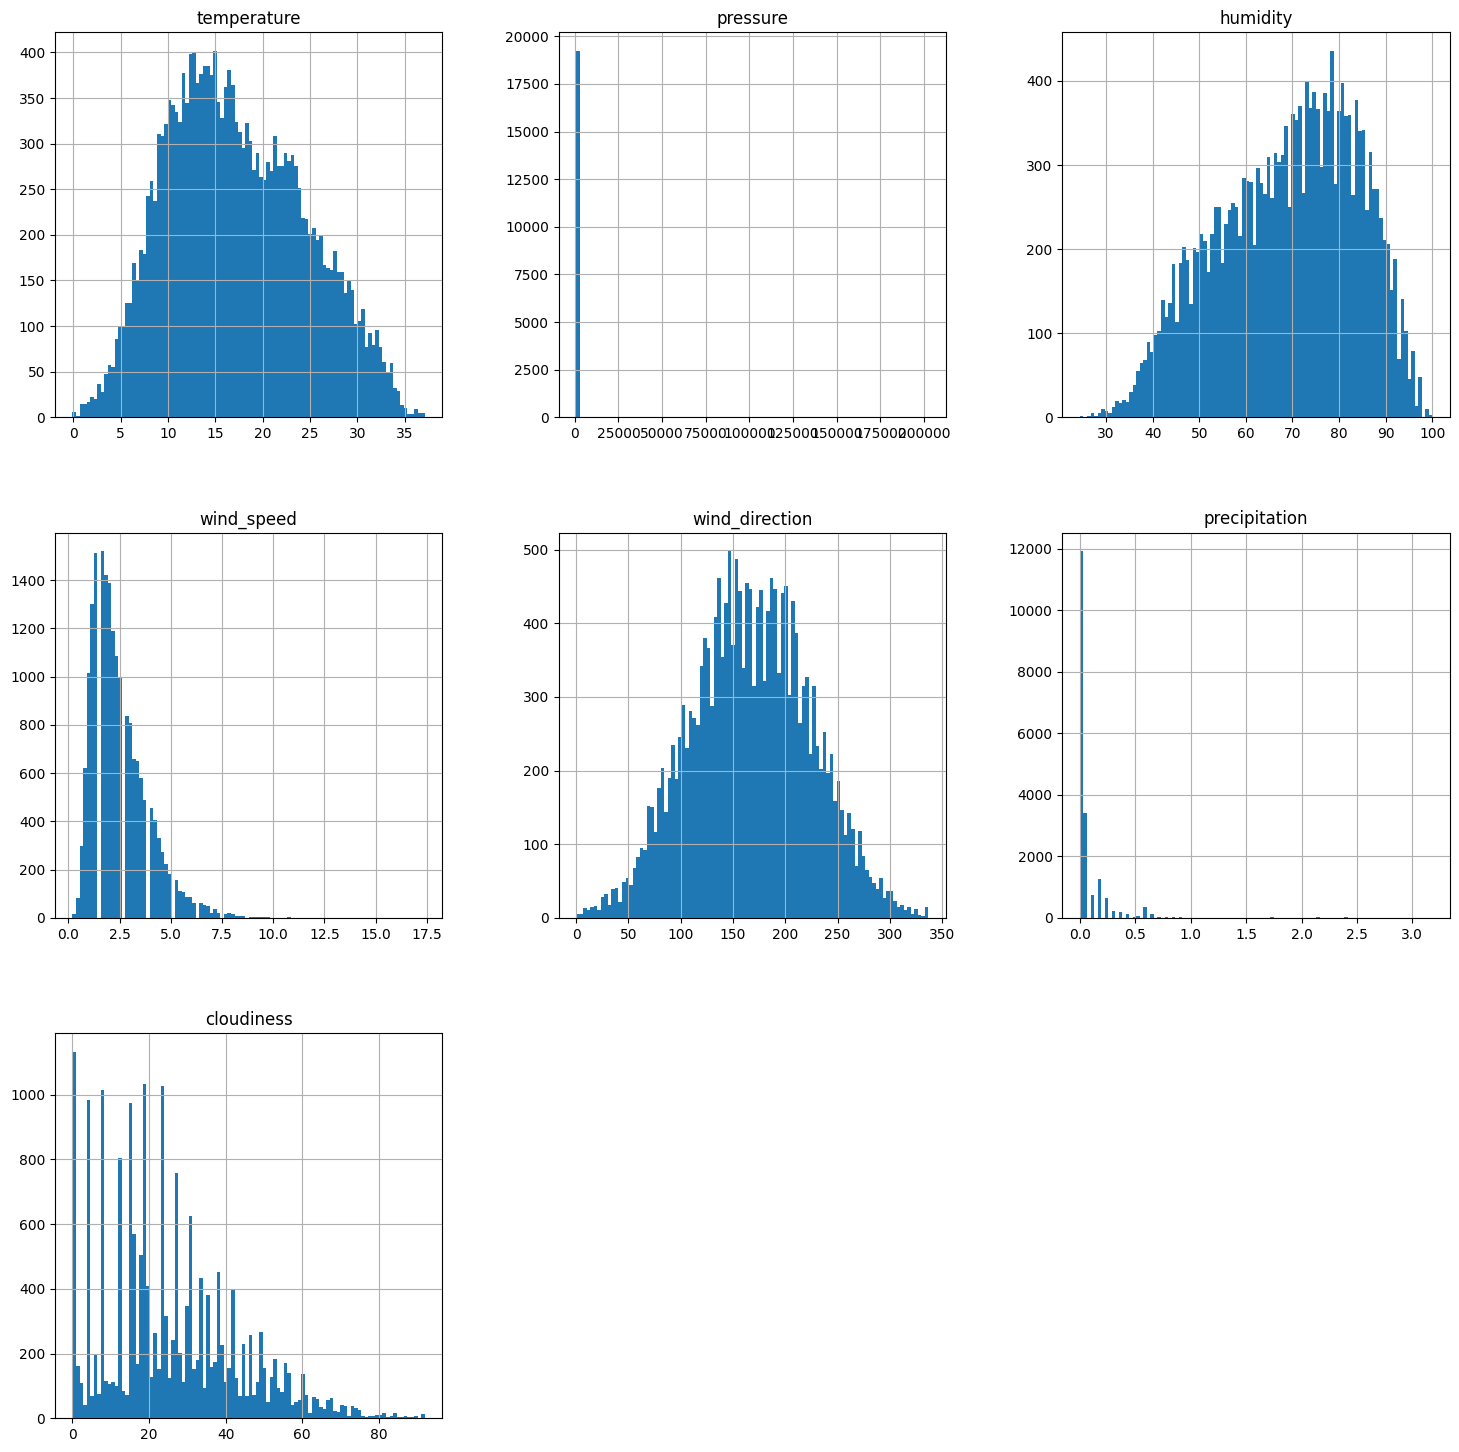

In [ ]:
#양적 변수 분포 시각화
quan_df.hist(bins=100, figsize=(18,18))
plt.show()

<Axes: xlabel='snowing', ylabel='count'>

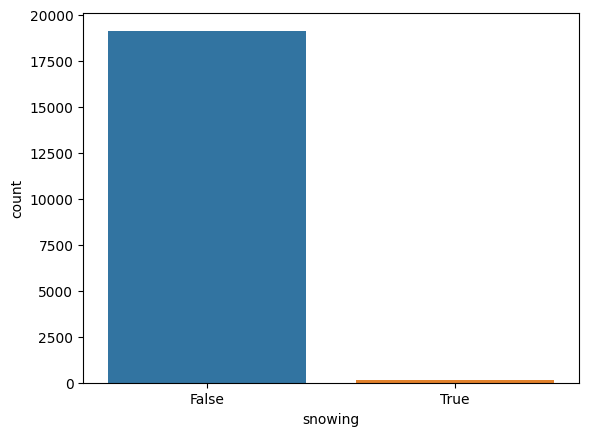

In [ ]:
#질적 변수 빈도 시각화
sns.countplot(x = qual_df['snowing'])

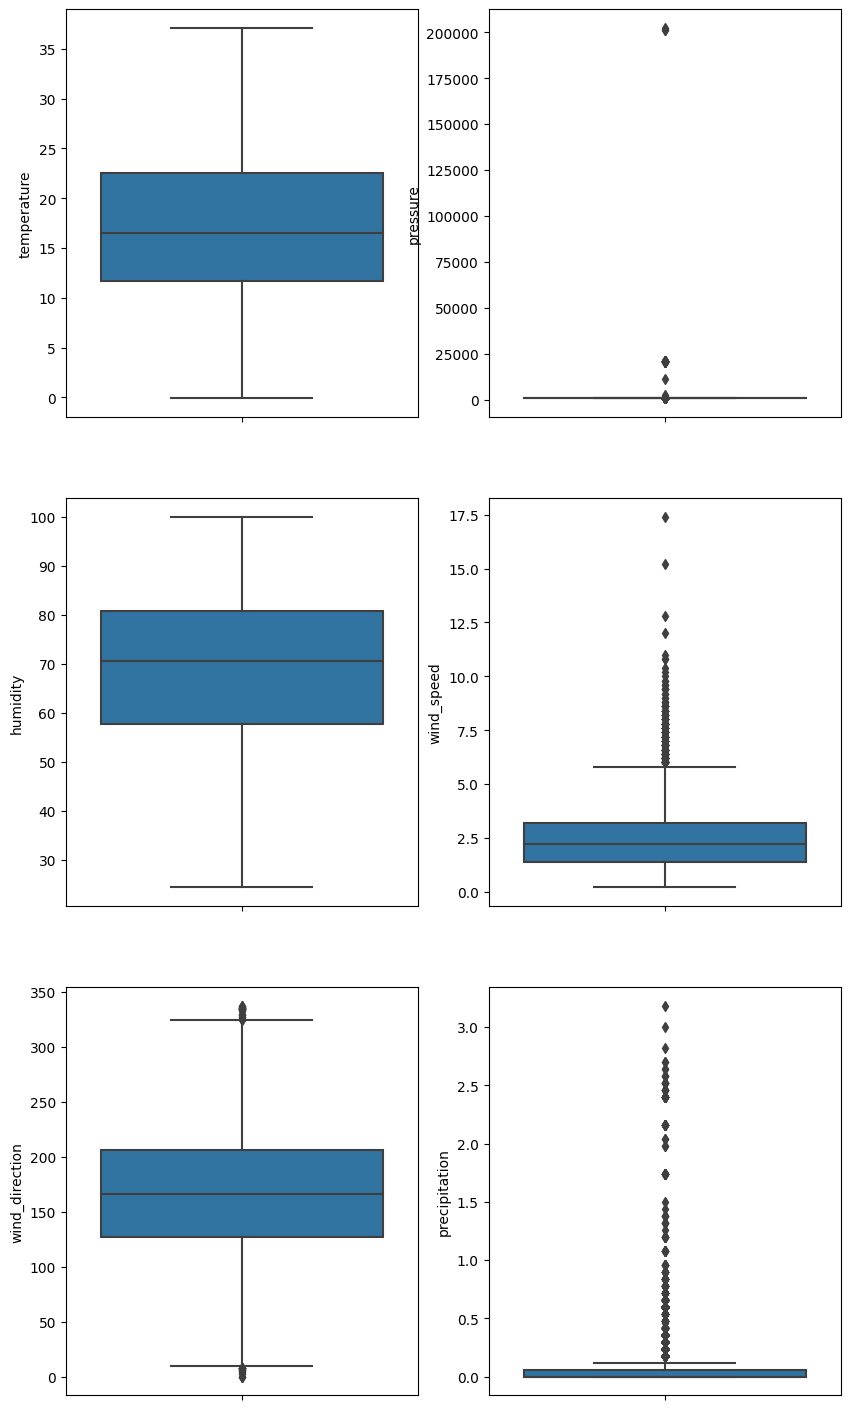

In [ ]:
#이상치 확인
fig, axes = plt.subplots(3,2, figsize=(10,18))

sns.boxplot(y = quan_df['temperature'], ax=axes[0][0])
sns.boxplot(y = quan_df['pressure'], ax=axes[0][1])

sns.boxplot(y = quan_df['humidity'], ax=axes[1][0])
sns.boxplot(y = quan_df['wind_speed'], ax=axes[1][1])

sns.boxplot(y = quan_df['wind_direction'], ax=axes[2][0])
sns.boxplot(y = quan_df['precipitation'], ax=axes[2][1])



plt.show()

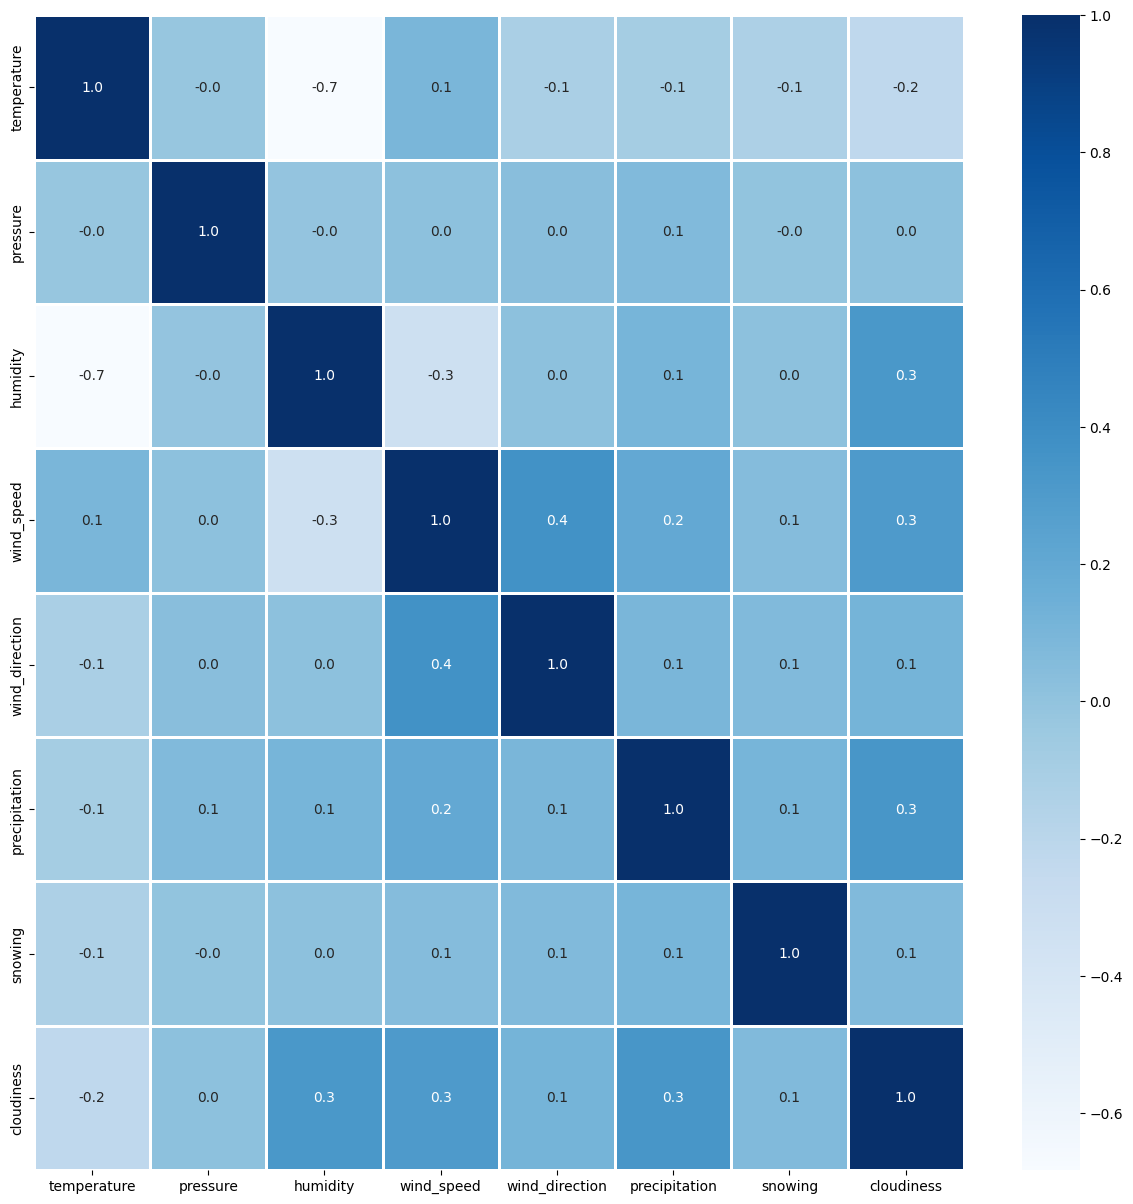

In [ ]:
#상관관계 히트맵
plt.figure(figsize = (15,15))
sns.heatmap(train.drop(columns=['id'], axis=1).corr(), annot = True, fmt = '.1f', linewidth = 1, cmap = 'Blues')

plt.show()